---
# Wine Quality "Warm up" Challenge
### Physicochemical factors that predict good quality wine
---
The "warm up" challenge for this year is adapted from the well-known 'Wine Quality' challenge on Kaggle. In particular, given a dataset containing several attributes describing wine, your task is to make predictions on the quality of as-yet unlisted wine samples. Developing a model which accurately fits the available training data while also generalising to unseen data-points is a multi-faceted challenge that involves a mixture of data exploration, pre-processing, model selection, and performance evaluation.

**IMPORTANT**: please refer to the AML course guidelines concerning grading rules. Pay especially attention to the **presentation quality** item, which boils down to: don't dump a zillion of lines of code and plots in this notebook. Produce a concise summary of your findings: this notebook can exist in two versions, a "scratch" version that you will use to work and debug, a "presentation" version that you will submit. The "presentation" notebook should go to the point, and convay the main findings of your work.

---
## Overview
Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist. In this regard, your notebook should be structured in such a way as to explore the following tasks, that are expected to be carried out whenever undertaking such a project. The description below each aspect should serve as a guide for your work, but you are can also explore alternative options and directions. Thinking outside the box will be rewarded in these challenges.

### 1. Data preparation:
   
_Data exploration_: The first broad component of your work should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification. Among others, you can work on:
   
* Data cleaning, e.g. treatment of categorial variables;
* Data visualisation; Computing descriptive statistics, e.g. correlation.

_Data Pre-processing_: The previous step should give you a better understanding of which pre-processing is required for the data. This may include:

* Normalising and standardising the given data;
* Removing outliers;
* Carrying out feature selection, possibly using metrics derived from information theory;
* Handling missing information in the dataset;
* Augmenting the dataset with external information;
* Combining existing features.

Note that, as the name implies, this is a warm-up challenge, which essentially means that data is already put in a convenient format that requires minimal pre-processing.

### 2. Model selection
An important part of the work involves the selection of a model that can successfully handle the given data and yield sensible predictions. Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models. There is a wealth of models to choose from, such as decision trees, random forests, (Bayesian) neural networks, Gaussian processes, LASSO regression, and so on. 

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning. There are several techniques for carrying out such a procedure, such as cross-validation.

### 3. Performance evaluation
The evaluation metric for this project is "Log Loss". For the N wines in the test data set, the metric is calculated as:

\\(\mathcal{L} = \frac{1}{N} \sum_{i=1}^{N} y_i p_i + (1-y_i) \log(1-p_i)\\)

where \\(y\\) is the true (but withheld) quality outcome for wine \\(i\\) in the test data set, and \\(p\\) is the predicted probability of good quality for wine \\(i\\). Larger values of \\(\mathcal{L}\\) indicate poorer predictions.

---
## Dataset description
You will be working on two data files, which will be available in ```/mnt/datasets/wine/```, one for red and one for white wines:

* winequality-red.csv 
* winequality-white.csv

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference Cortez et al., 2009. Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Tips
A possible trick is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. Note that this can be seen as a data preparation task.

### Training and test sets
We leave to the students to decide how to carve out training and test sets (validation sets too, if relevant to your approach). This is non a competition whereby the instructors hold a "private" test set to rank students' models.



P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Attributes

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

### 1. Data preparation:

### 1.1 Data cleaning:

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


dataset_r = pd.read_csv('winequality-red.csv')
dataset_w = pd.read_csv('winequality-white.csv')

In [244]:
# Create categories 

def get_column_list(df) :
    # Return the columns of the dataframe 
    return df.columns[0].replace('"','').split(';')
    
def convert_to_df(df) :
    # Convert the df into a new one with clean columns
    
    columns = get_column_list(df)
    
    rows = [df.iloc[:,0][i].split(';') for i in range(df.shape[0])] 
    
    new_df = pd.DataFrame(rows, columns = columns, dtype = np.int8)
    return new_df
    

dataset_r = convert_to_df(dataset_r)
dataset_w = convert_to_df(dataset_w)


In [245]:
# Merge the two datasets. No need to add a feature whether is it a red or white wine
# Indeed, we think that the color of the wine won't affect the quality
dataset = pd.concat([dataset_r, dataset_w], axis = 0).astype(float)




In [246]:
# No missing values
(dataset.isnull()*1).sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 1.2 Data visualisation

In [247]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Data Pre-processing

In [248]:
# Binary classification problem
dataset.quality.loc[ (dataset.quality < 7)] = 0
dataset.quality.loc[ (dataset.quality >= 7) ] = 1

<IPython.core.display.Javascript object>


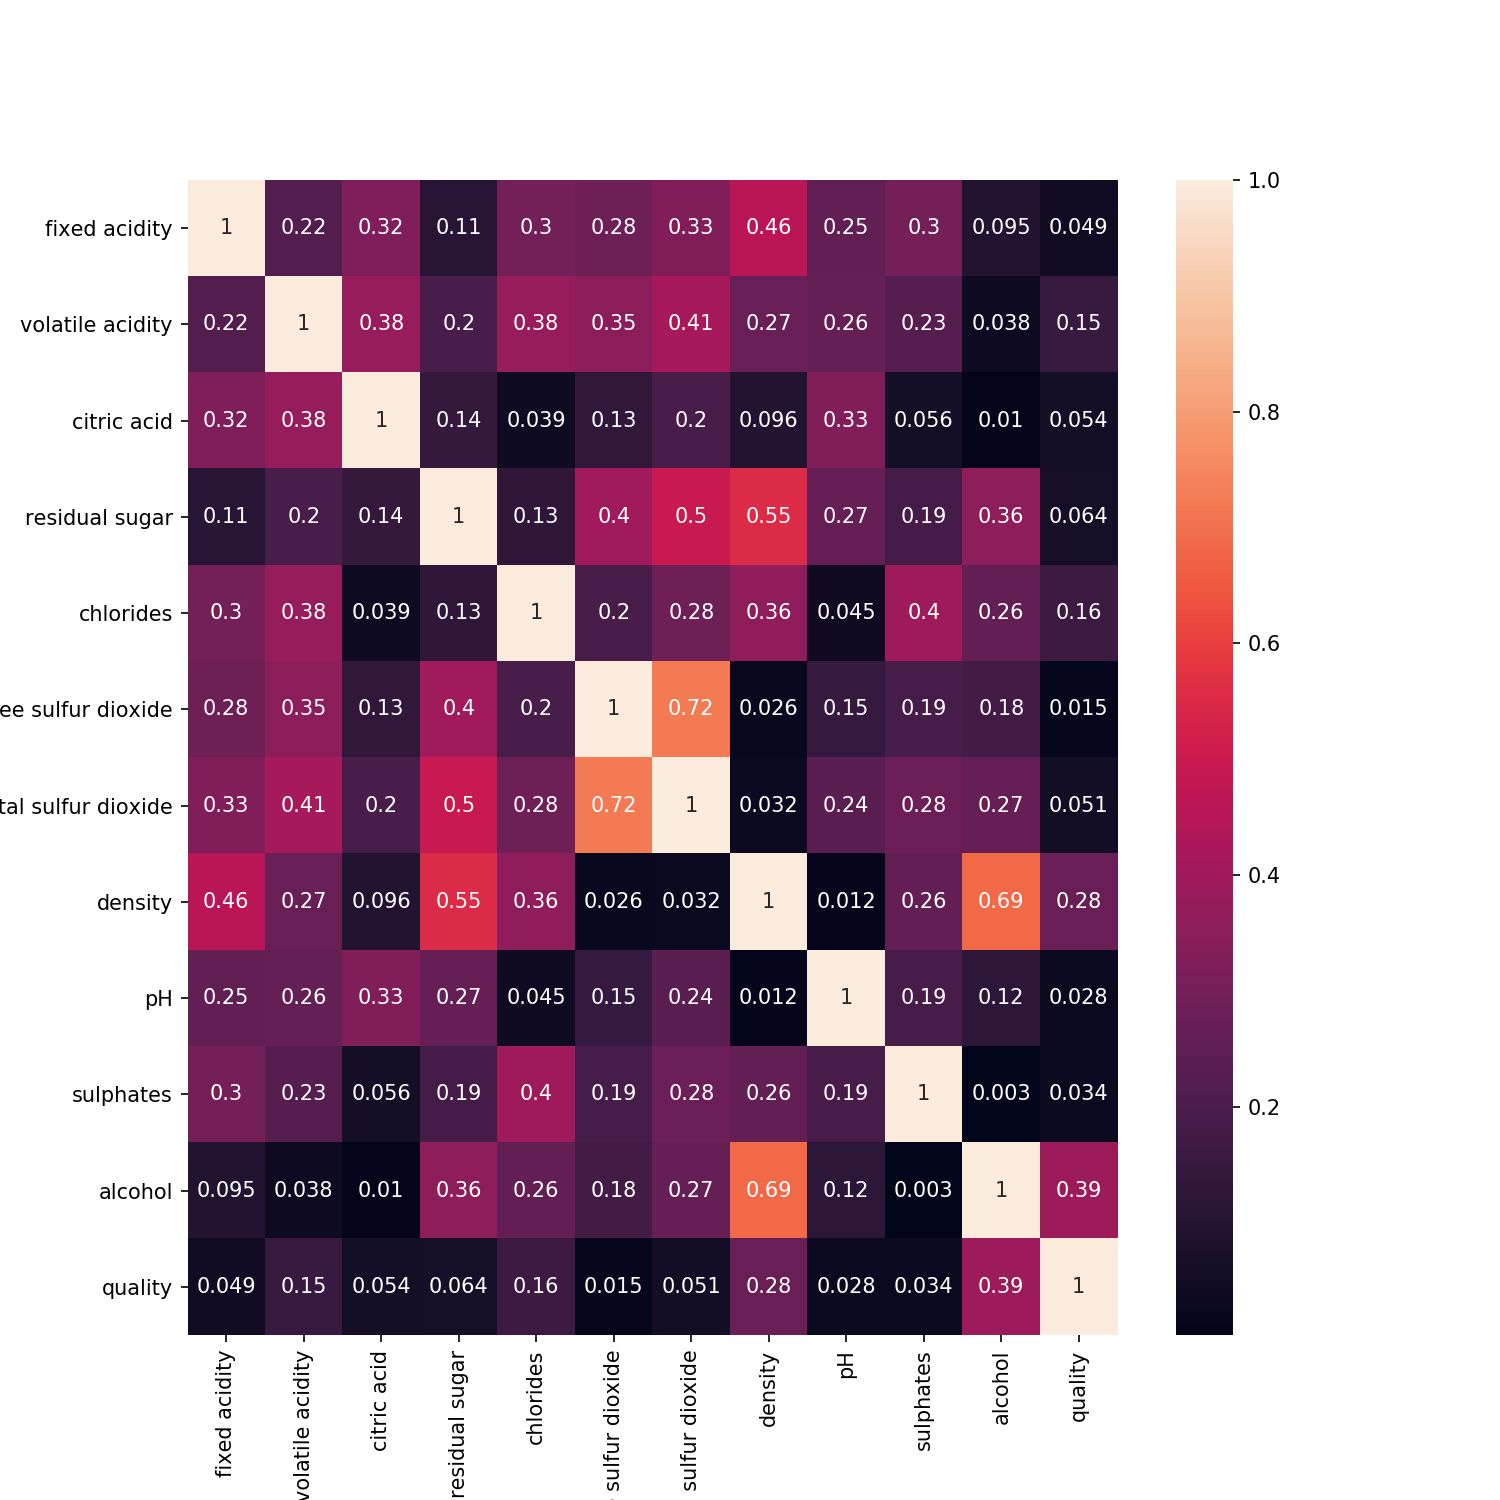

In [249]:
%matplotlib notebook
corr_matrix = dataset.corr().abs()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corr_matrix, annot=True, ax = ax)
plt.show()



In [250]:
best_features = corr_matrix['quality'].drop('quality').drop('free sulfur dioxide').sort_values(ascending=False).index
print(best_features)

Index(['alcohol', 'density', 'chlorides', 'volatile acidity', 'residual sugar',
       'citric acid', 'total sulfur dioxide', 'fixed acidity', 'sulphates',
       'pH'],
      dtype='object')


In [251]:
# free sulfur dioxide and total sulfur dioxide are very corelated, we remove one
# we choose to drop 'free sulfur dioxide' since it is not very correlated with the quality

dataset_before_droping = dataset

dataset['free sulfur dioxide'] = dataset['free sulfur dioxide']
dataset = dataset.drop('free sulfur dioxide', axis = 1)



In [285]:
# Choose k best features

k=3

dataset = dataset_before_droping
dataset['free sulfur dioxide'] = dataset['free sulfur dioxide']
dataset = dataset.drop('free sulfur dioxide', axis = 1)

for i in range(len(best_features)-k):
    print('drop ' + best_features[-(i+1)])
    dataset=dataset.drop(best_features[-(i+1)], axis = 1)

drop pH
drop sulphates
drop fixed acidity
drop total sulfur dioxide
drop citric acid
drop residual sugar
drop volatile acidity


In [286]:
# We need to normalize whenever the dataset contains dataset with different ranges.
# Useful link to understand : https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

dataset.describe()


,chlorides,density,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.056034,0.994697,10.491801,0.196552
std,0.035034,0.002999,1.192712,0.397421
min,0.009000,0.987110,8.000000,0.000000
25%,0.038000,0.992340,9.500000,0.000000
50%,0.047000,0.994890,10.300000,0.000000
75%,0.065000,0.996990,11.300000,0.000000
max,0.611000,1.038980,14.900000,1.000000


In [305]:
from sklearn.model_selection import train_test_split

SEED = 77

target = dataset.quality.values
X = dataset.drop('quality', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.2,random_state=SEED)


In [306]:
# Normalization 

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)


In [307]:
# Standarisation 

from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train_norm)
    
# transform the training data column
X_train_stand = scale.transform(X_train_norm)
    
# transform the testing data column
X_test_stand = scale.transform(X_test_norm)


In [308]:
X_train_norm[1]

array([0.03654485, 0.37041828, 0.31884058])

### 2. Model selection

In [309]:
# Linear regression

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = SEED).fit(X_train_stand, y_train)


D:\WorkSpace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [310]:
# SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=SEED, tol=1e-9, max_iter = 20000).fit(X_train_stand, y_train)



In [311]:
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train_stand, y_train)


### 3. Performance evaluation


In [312]:
from sklearn.metrics import log_loss

print("Log loss for linear regression : {}".format(log_loss( log.predict(X_test_stand), y_test   )))
print("Log loss for SVM : {}".format(log_loss( svm.predict(X_test_stand), y_test   )))
print("Log loss for LDA : {}".format(log_loss( lda.predict(X_test_stand), y_test   )))



Log loss for linear regression : 6.2702393451422775
Log loss for SVM : 6.509370557976749
Log loss for LDA : 6.456209375909802


In [313]:
print(log.score(X_test_stand, y_test))
print(svm.score(X_test_stand, y_test))
print(lda.score(X_test_stand, y_test))

0.8184615384615385
0.8115384615384615
0.813076923076923
